In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import PyGnuplot as gp

sns.set()
sns.set_style("whitegrid")



bw_data = pd.read_excel('../BWs.xlsx', sheet_name='Summary')
ns_data = pd.read_excel('../NS-Allgather-MVAPICH.xlsx', sheet_name='Summary')


MessageSizes = list(bw_data['Unnamed: 0'][3:17])


In [9]:
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=20, family='Times')
def my_plot(subplot, x, y, labels):    
    colors = ['blue', 'red', 'green', 'black', 'orange', 'teal', 'purple', 'navy']
    
    for i in range(len(labels)):
        subplot.plot(x, y[i], '-x', color=colors[i], label=labels[i] , markersize=10, linewidth=2)
    
    
    subplot.tick_params(labelsize=14)
    subplot.set_xticks(x[-4:])
    
    
    subplot.set_xlabel('Message Size (B)', fontproperties=font_prop)
    subplot.set_ylabel('Latency (us)', fontproperties=font_prop)
    
    subplot.legend(fontsize=15)
    
def compute_relatives(base, results):
    relatives=[]
    for r in results:
        relatives.append([i/j for i,j in zip(r, base)])
    return relatives

def plot_bars(x, overheads, labels, captions):
    colors = ['blue', 'red', 'green', 'orange', 'black', 'pink']
    barwidth = 0.2
    fig =plt.subplots(figsize=(10, 8))
    
    for i in range(len(overheads)):
        x_br = [j + i*barwidth for j in range(len(x))]
        plt.bar(x_br, overheads[i], width=barwidth, label=labels[i], color=colors[i])
        
    plt.xlabel(captions[0], fontproperties=font_prop)
    plt.ylabel(captions[1], fontproperties=font_prop)
    
    plt.xticks([r + barwidth for r in range(len(x))], [str(s) for s in x], rotation=90)
    plt.tick_params(labelsize=15)
    plt.legend(fontsize=15)
    plt.show()
    

def categorize(lists, l_t):
    s_list, l_list= [], []
    for l in lists:
        s_list.append(l[:l_t])
        l_list.append(l[l_t:])
    return s_list, l_list


from scipy.optimize import curve_fit
import numpy as np

def func(x, a, b):
    return a + b*x


def plot_model(subplot, x, y):
    popt, pcov = curve_fit(func, x, y, bounds=(0,np.inf))
    
    model_data = [func(m, *popt) for m in x]

    subplot.plot(x, y, 'o', color='blue', label='Benchmark' , markersize=10, linewidth=2)
    subplot.plot(x, model_data, '-x', color='red', label='Model' , markersize=10, linewidth=2)
    subplot.tick_params(labelsize=14)
    subplot.set_xticks(x[-4:])
    
    
    subplot.set_xlabel('Message Size (B)', fontproperties=font_prop)
    subplot.set_ylabel('Latency (us)', fontproperties=font_prop)
    
    subplot.legend(fontsize=15)
    return popt

def collective_model(x, a_inter, b_inter, a_intra, b_intra, model, n, p):
    if model=='RingNB':
        return (n*p-1) * (a_inter +  b_inter * x)
    elif model=='ML-Ring':
        return (n-1)* (a_inter + b_inter * x) + (p-1)*n*(a_intra+b_intra*x)
    


def plot_collective_model(subplot, x, y, model, n, p, a_inter, b_inter, a_intra, b_intra):
    popt, pcov = curve_fit(func, x, y, bounds=(0,np.inf))
    
    model_data = [collective_model(m, a_inter, b_inter, a_intra, b_intra, model, n, p) for m in x]

    subplot.plot(x, y, 'o', color='blue', label='Benchmark' , markersize=10, linewidth=2)
    subplot.plot(x, model_data, '-x', color='red', label='Model' , markersize=10, linewidth=2)
    subplot.tick_params(labelsize=14)
    subplot.set_xticks(x[-4:])
    
    
    subplot.set_xlabel('Message Size (B)', fontproperties=font_prop)
    subplot.set_ylabel('Latency (us)', fontproperties=font_prop)
    
    subplot.legend(fontsize=15)
    return popt


# NS -Intra Bandwidth

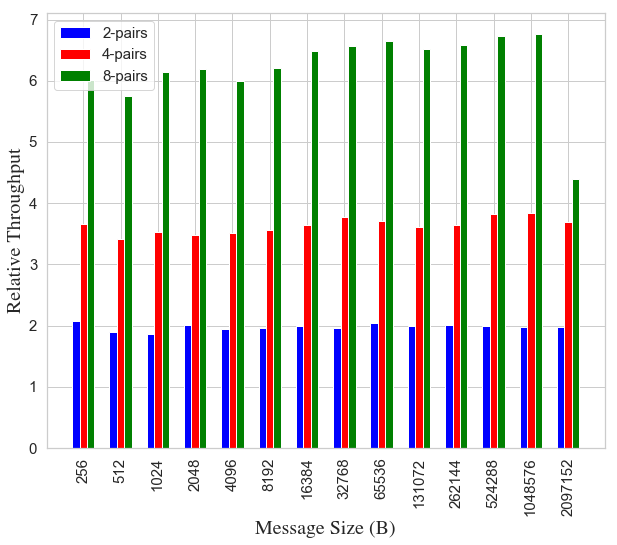

In [10]:
NS_Intra_1 = list(bw_data['Unnamed: 1'][3:17])
NS_Intra_2 = list(bw_data['Unnamed: 2'][3:17])
NS_Intra_4 = list(bw_data['Unnamed: 3'][3:17])
NS_Intra_8 = list(bw_data['Unnamed: 4'][3:17])

relative_throughputs = compute_relatives(NS_Intra_1, [NS_Intra_2, NS_Intra_4, NS_Intra_8])

plot_bars(MessageSizes, relative_throughputs, ['2-pairs', '4-pairs', '8-pairs', '16-pairs'], ['Message Size (B)', 'Relative Throughput'])


# NS - Inter Bandwidth

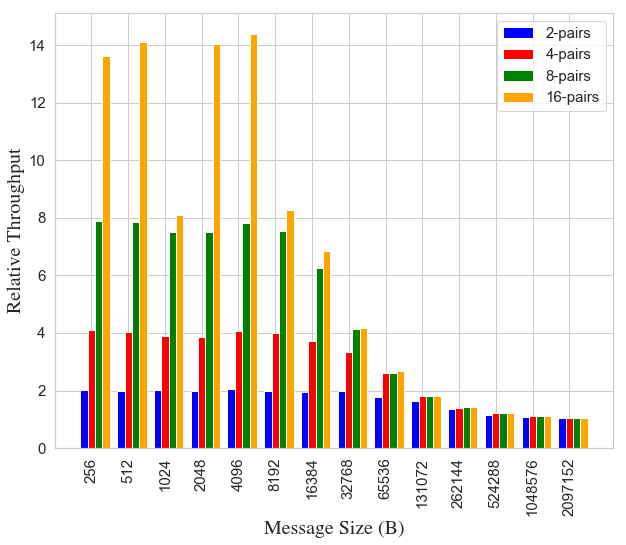

In [11]:
NS_Inter_1 = list(bw_data['Unnamed: 1'][25:39])
NS_Inter_2 = list(bw_data['Unnamed: 2'][25:39])
NS_Inter_4 = list(bw_data['Unnamed: 3'][25:39])
NS_Inter_8 = list(bw_data['Unnamed: 4'][25:39])
NS_Inter_16 = list(bw_data['Unnamed: 5'][25:39])

relative_throughputs = compute_relatives(NS_Inter_1, [NS_Inter_2, NS_Inter_4, NS_Inter_8, NS_Inter_16])

plot_bars(MessageSizes, relative_throughputs, ['2-pairs', '4-pairs', '8-pairs', '16-pairs'], ['Message Size (B)', 'Relative Throughput'])



In [15]:
NS_Intra_1 = list(bw_data['Unnamed: 9'][3:17])
NS_Intra_2 = list(bw_data['Unnamed: 10'][3:17])
NS_Intra_4 = list(bw_data['Unnamed: 11'][3:17])
NS_Intra_8 = list(bw_data['Unnamed: 12'][3:17])



print(NS_Intra_4)


# f = plt.figure(figsize=(16,6))
# h1 = f.add_subplot(121)
# h2 = f.add_subplot(122)
 
# [a_intra_s, b_intra_s] = plot_model(h1, MessageSizes[:8], NS_Intra_4[:8])
# [a_intra_l, b_intra_l] = plot_model(h2, MessageSizes[8:], NS_Intra_4[8:])

# plt.legend(prop=font_prop)
# plt.tight_layout()
# plt.title("Unencrypted", fontproperties=font_prop)





# plt.plot(MessageSizes[8:], NS_Intra_2[8:])
# plt.show()

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


ValueError: array must not contain infs or NaNs

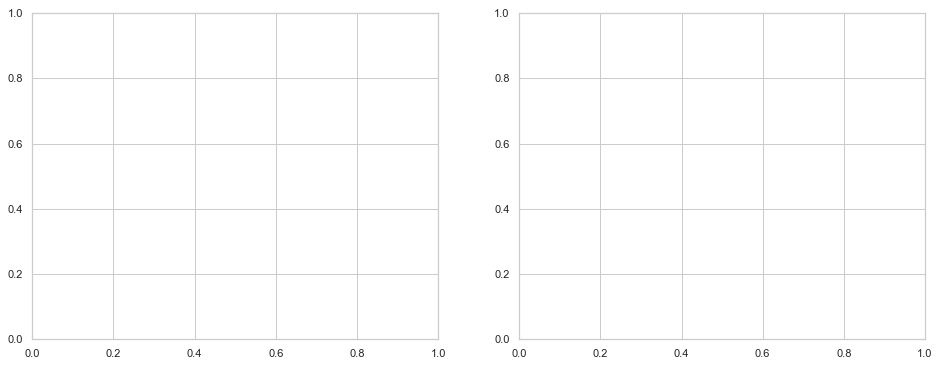

In [7]:
NS_Inter_1 = list(bw_data['Unnamed: 9'][25:39])
NS_Inter_2 = list(bw_data['Unnamed: 10'][25:39])
NS_Inter_4 = list(bw_data['Unnamed: 11'][25:39])
NS_Inter_8 = list(bw_data['Unnamed: 12'][25:39])
NS_Inter_16 = list(bw_data['Unnamed: 13'][25:39])






f = plt.figure(figsize=(16,6))
h1 = f.add_subplot(121)
h2 = f.add_subplot(122)
 
[a_inter_s, b_inter_s] = plot_model(h1, MessageSizes[:8], NS_Inter_1[:8])
[a_inter_l, b_inter_l] = plot_model(h2, MessageSizes[8:], NS_Inter_1[8:])

plt.legend(prop=font_prop)
plt.tight_layout()
plt.title("Unencrypted", fontproperties=font_prop)





Text(0.5, 1.0, 'RingNB')

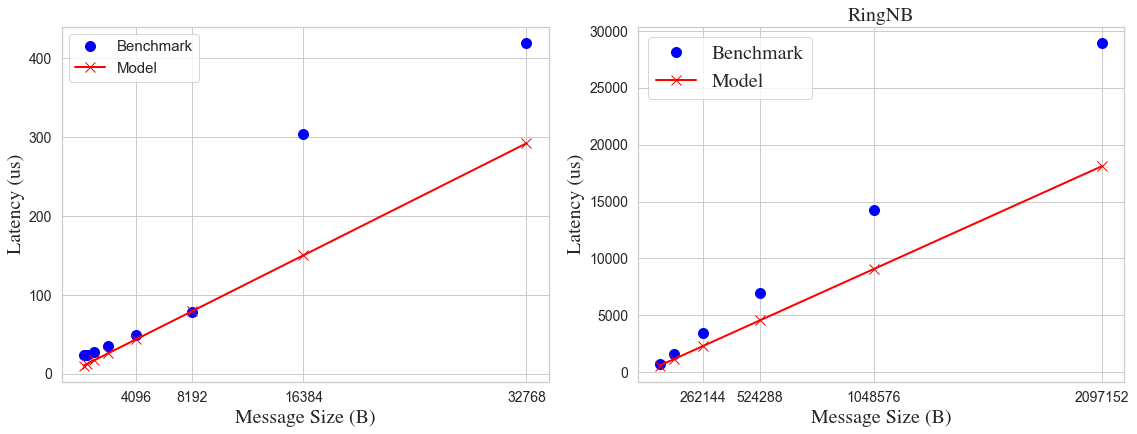

In [36]:
NS_Unenc_Default_4_32 = list(ns_data['Unnamed: 1'][3:17])
NS_Unenc_Default_SendPlus_4_32 = list(ns_data['Unnamed: 2'][3:17])
NS_Unenc_NB_4_32 = list(ns_data['Unnamed: 3'][3:17])
NS_Unenc_RingNB_4_32 = list(ns_data['Unnamed: 4'][3:17])
NS_Unenc_ML_4_32 = list(ns_data['Unnamed: 5'][3:17])
NS_Unenc_MLRD_4_32 = list(ns_data['Unnamed: 6'][3:17])



f = plt.figure(figsize=(16,6))
h1 = f.add_subplot(121)
h2 = f.add_subplot(122)
 
plot_collective_model(h1, MessageSizes[:8], NS_Unenc_RingNB_4_32[:8], 'RingNB', 4, 8, a_inter_s, b_inter_s, a_intra_s, b_intra_s)
plot_collective_model(h2, MessageSizes[8:], NS_Unenc_RingNB_4_32[8:], 'RingNB', 4, 8, a_inter_l, b_inter_l, a_intra_l, b_intra_l)

plt.legend(prop=font_prop)
plt.tight_layout()
plt.title("RingNB", fontproperties=font_prop)



Text(0.5, 1.0, 'ML-Ring')

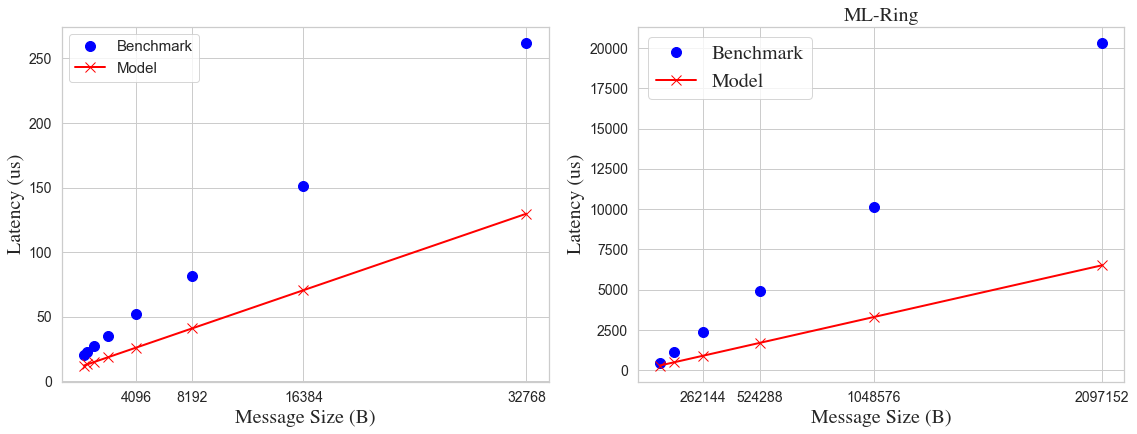

In [37]:
f = plt.figure(figsize=(16,6))
h1 = f.add_subplot(121)
h2 = f.add_subplot(122)
 
plot_collective_model(h1, MessageSizes[:8], NS_Unenc_ML_4_32[:8], 'ML-Ring', 4, 8, a_inter_s, b_inter_s, a_intra_s, b_intra_s)
plot_collective_model(h2, MessageSizes[8:], NS_Unenc_ML_4_32[8:], 'ML-Ring', 4, 8, a_inter_l, b_inter_l, a_intra_l, b_intra_l)


plt.legend(prop=font_prop)
plt.tight_layout()
plt.title("ML-Ring", fontproperties=font_prop)

